In [1]:
### Pre-proccessing ###

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("user_behavior_dataset.csv")

# Drop unnecessary columns and handle missing values
df = df.drop(columns=["User ID", "Device Model"])
if df.isnull().sum().sum() > 0:
    df = df.dropna()

# Map categorical variables to numerical values
df["Operating System"] = df["Operating System"].map({"Android": 0, "iOS": 1})
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# Define the numeric columns to standardize
numeric_columns = [
    "App Usage Time (min/day)",
    "Screen On Time (hours/day)",
    "Battery Drain (mAh/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)",
    "Age",
]

# Standardize numerical columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Save cleaned dataset to verify
df_cleaned = df.copy()
print(df_cleaned.head())
df_cleaned.to_csv("cleaned_user_behavior_dataset.csv", index=False)

   Operating System  App Usage Time (min/day)  Screen On Time (hours/day)  \
0                 0                  0.688256                    0.367626   
1                 0                 -0.017668                   -0.186771   
2                 0                 -0.661471                   -0.415053   
3                 0                 -0.181443                   -0.154160   
4                 1                 -0.475107                   -0.317218   

   Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                 0.423726                  0.606096             0.300405   
1                -0.237198                 -0.322441             0.022277   
2                -0.933550                 -0.693856            -0.949607   
3                 0.184279                  0.197540            -0.091787   
4                -0.193218                  0.271823             0.091028   

        Age  Gender  User Behavior Class  
0  0.126383       0            

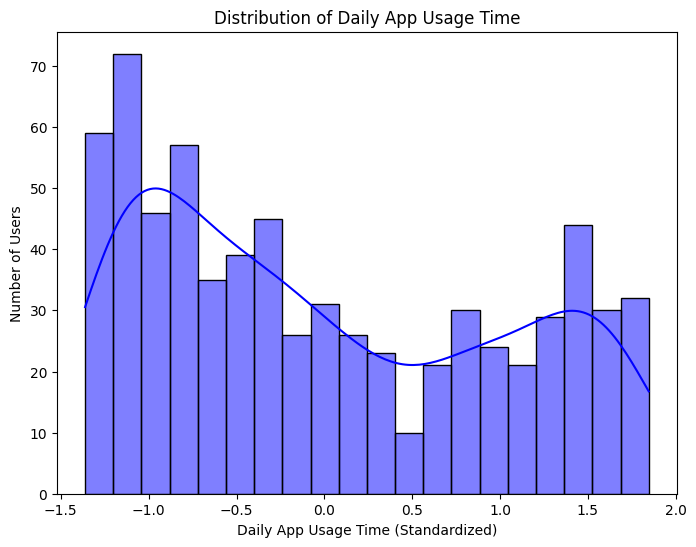

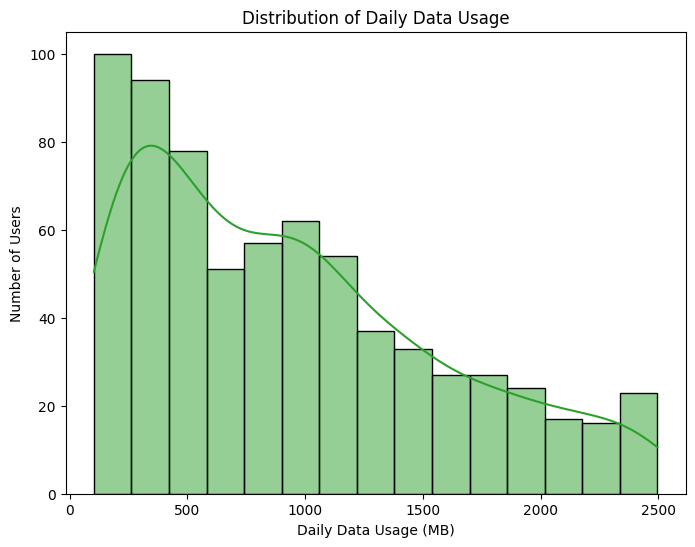

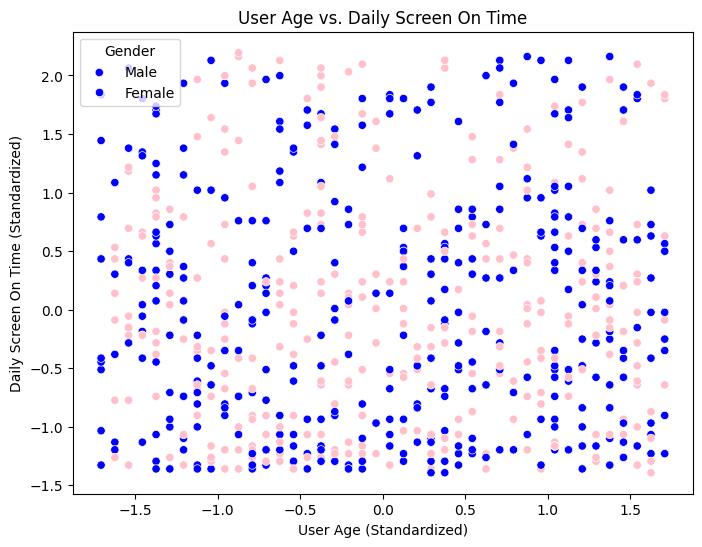

In [ ]:
## Visuals ##

#Distribution of Daily App Usage Time
df_cleaned = df_cleaned.rename(columns={"App Usage Time (min/day)": "Daily App Usage Time (Standardized)"})
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned["Daily App Usage Time (Standardized)"], bins=20, kde=True, color="blue")
plt.title("Distribution of Daily App Usage Time")
plt.xlabel("Daily App Usage Time (Standardized)")
plt.ylabel("Number of Users")
plt.show()

#Histogram of Daily Data Usage
df_original = pd.read_csv("user_behavior_dataset.csv") 
if "Data Usage (MB/day)" in df_original.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_original["Data Usage (MB/day)"], kde=True, bins=15, color="#2ca02c")
    plt.title("Distribution of Daily Data Usage")
    plt.xlabel("Daily Data Usage (MB)")
    plt.ylabel("Number of Users")
    plt.show()
else:
    print("Column 'Data Usage (MB/day)' not found in the dataset.")

#User Age vs. Daily Screen On Time
df_cleaned = df_cleaned.rename(columns={
    "Age": "User Age (Standardized)",
    "Screen On Time (hours/day)": "Daily Screen On Time (Standardized)"
})
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="User Age (Standardized)",
    y="Daily Screen On Time (Standardized)",
    hue="Gender",
    palette={0: "blue", 1: "pink"},
    data=df_cleaned,
)
plt.title("User Age vs. Daily Screen On Time")
plt.xlabel("User Age (Standardized)")
plt.ylabel("Daily Screen On Time (Standardized)")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()

## Task 3: Train the Random Forest Model
In this section, we will train a Random Forest model using the cleaned dataset to classify user behavior. The dataset will be split into training and testing subsets to evaluate the model's performance. Random Forest is an ensemble method that combines multiple decision trees and is well-suited for its robustness and ability to handle diverse features. We will assess its accuracy and review metrics like precision and recall to understand the model's effectiveness.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df_cleaned.drop(columns=["User Behavior Class"]) 
y = df_cleaned["User Behavior Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here we train the random forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Here we evaluate the model's performance
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



## Task 4: Experiment with SVM and Compare Results
In this section, we will train a Support Vector Machine (SVM) model using the same dataset and compare its performance with the Random Forest model. SVM is a powerful supervised learning algorithm that finds the optimal hyperplane to separate classes in the feature space, making it effective for high-dimensional and complex data. We will evaluate its accuracy, precision, and recall and compare these metrics to those of the Random Forest model. This comparison will provide insights into the strengths and weaknesses of each approach and help determine the most suitable model for this dataset.

In [ ]:
from sklearn.svm import SVC

# Here we train the SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Here we evaluate the model
y_pred_svm = svm_model.predict(X_test)
print("SVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Result comparison between the Random Forset model and the SVM model
print("Model Comparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")


SVM Model Performance:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Model Comparison:
Random Forest Accuracy: 1.0000
SVM Accuracy: 1.0000


## Why do we get 100% accuracy for both models? ##

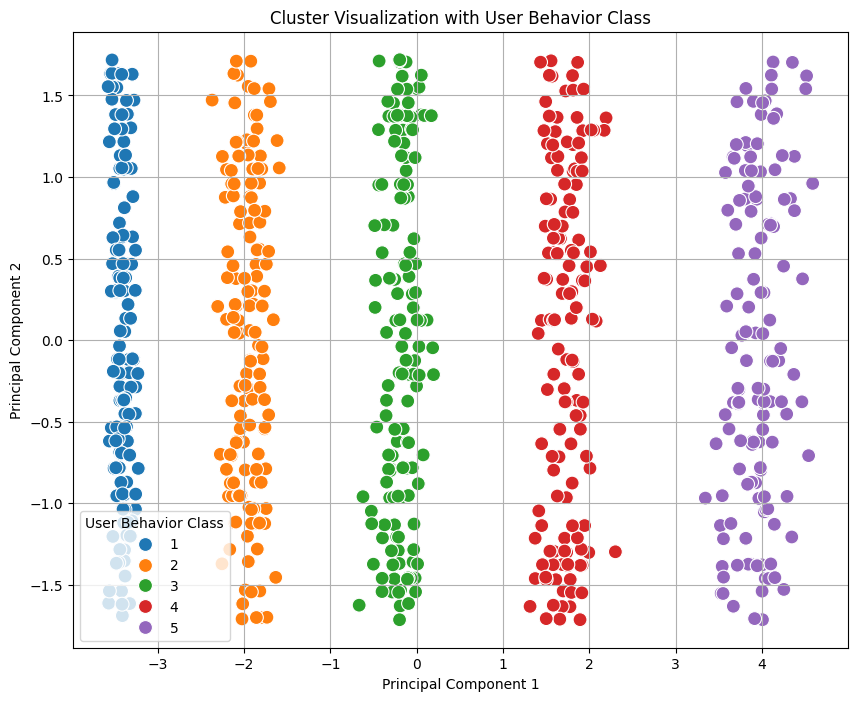

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

features = df_cleaned.select_dtypes(include=[float, int])

# Apply PCA for 2D transformation
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(features)

# Perform KMeans clustering for reference (optional)
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(features)

# Prepare PCA DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=["PCA1", "PCA2"])

# Check if "User Behavior Class" exists and visualize
if "User Behavior Class" in df_cleaned.columns:
    pca_df["User Behavior Class"] = df_cleaned["User Behavior Class"]
    
    # Plot the clusters with user behavior class as hue
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=pca_df, 
        x="PCA1", 
        y="PCA2", 
        hue="User Behavior Class", 
        palette="tab10", 
        s=100
    )
    plt.title("Cluster Visualization with User Behavior Class")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="User Behavior Class")
    plt.grid(True)
    plt.show()

The 100% accuracy observed in the models can be attributed to the separability of the data, as shown by the clustering visualization. The PCA plot shows that the clusters formed based on the dataset features align closely with the "User Behavior Class" labels, indicating that the classes are inherently well-separated in the feature space. This separation simplifies the classification task for machine learning models, enabling them to predict the class labels with perfect accuracy. However, while this outcome highlights the dataset's strong inherent structure, it may also suggest that the dataset lacks complexity or variability, which could limit the models' ability to generalize new or more diverse data.